# Part 1: Data Preprocessing

Understanding the variables simply by looking at the definitions, we see first that all of them have to be above 0, except maybe for depth.
Season should be labeled ecnoded (0,1,2,3)a sit is a categorical variable. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data_ = pd.read_csv('/Users/dm1223/Desktop/dsml-2024-edsml-dm1223/data/Hs.csv')
data_.head()

,Xp,Yp,Hsig,Dir,Depth,X-Windv,Y-Windv,U10,Season,Temperature,Wind_Speed,Wave_Steepness,Wind_Dir_Category
0,52.57,27.38,0.03444,353.248,35.6057,0.3128,-1.7557,1.06,Summer,14.045279,1.783347,0.023272,West
1,52.57,27.38,0.03459,350.817,35.6057,0.4156,-1.0176,0.40,Summer,13.727790,1.099197,0.022787,West
2,52.57,27.38,0.03479,354.399,35.6057,0.4148,-1.7209,1.26,Summer,14.120766,1.770185,0.025072,West
3,52.57,27.38,0.03502,348.335,35.6057,0.1343,-0.3577,1.39,Fall,14.558437,0.382081,0.022834,West
4,52.57,27.38,0.03545,138.355,35.6057,1.9610,-0.3797,1.06,Summer,13.679845,1.997422,0.016984,East


In [62]:
data = data_.copy()
data.drop(columns = ['Xp', 'Yp', 'U10', 'Wave_Steepness'], inplace=True)

In [63]:
data.duplicated().sum() #9
data.drop_duplicates(inplace=True)
data.shape
data.isnull().sum()


Hsig                  0
Dir                   0
Depth                 0
X-Windv               0
Y-Windv              16
Season                8
Temperature           8
Wind_Speed           16
Wind_Dir_Category     8
dtype: int64

As we can see, some data are Null, so we may consider take them off as there only a few

In [64]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

,Hsig,Dir,Depth,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category
0,0.03444,353.248,35.6057,0.3128,-1.7557,Summer,14.045279,1.783347,West
1,0.03459,350.817,35.6057,0.4156,-1.0176,Summer,13.727790,1.099197,West
2,0.03479,354.399,35.6057,0.4148,-1.7209,Summer,14.120766,1.770185,West
3,0.03502,348.335,35.6057,0.1343,-0.3577,Fall,14.558437,0.382081,West
4,0.03545,138.355,35.6057,1.9610,-0.3797,Summer,13.679845,1.997422,East


In [65]:
xy = data.copy()

In [66]:
xy.describe()

,Hsig,Dir,Depth,X-Windv,Y-Windv,Temperature,Wind_Speed
count,68700.000000,68700.000000,6.870000e+04,68700.000000,68700.000000,68700.000000,68700.000000
mean,0.435389,220.545658,3.560570e+01,1.703099,-1.251485,13.797785,3.888229
std,0.339275,150.762981,7.105479e-15,2.881887,2.820067,0.500162,2.367770
min,0.034440,0.000000,3.560570e+01,-9.087300,-11.874300,11.564120,0.035977
25%,0.175168,63.473500,3.560570e+01,-0.262875,-3.090000,13.458761,2.099363
50%,0.318310,340.240000,3.560570e+01,1.612400,-1.275900,13.799923,3.235630
75%,0.608995,353.503250,3.560570e+01,3.600725,0.662550,14.136728,5.286243
max,2.271350,360.000000,3.560570e+01,12.412800,11.782200,16.036464,13.467091


Good news, looking at max and minmum values it appears that we have no apparent outliers. However we may consider scaling Dir or apply to it a log function as it is not of the same scale as the other values. 

In [67]:
def log(x):
    return np.log(x)

xy["Dir_log"] = log(xy['Dir'] + 0.01) # To avoid negative values
xy.head()


,Hsig,Dir,Depth,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log
0,0.03444,353.248,35.6057,0.3128,-1.7557,Summer,14.045279,1.783347,West,5.867199
1,0.03459,350.817,35.6057,0.4156,-1.0176,Summer,13.727790,1.099197,West,5.860293
2,0.03479,354.399,35.6057,0.4148,-1.7209,Summer,14.120766,1.770185,West,5.870452
3,0.03502,348.335,35.6057,0.1343,-0.3577,Fall,14.558437,0.382081,West,5.853193
4,0.03545,138.355,35.6057,1.9610,-0.3797,Summer,13.679845,1.997422,East,4.929895


<Axes: >

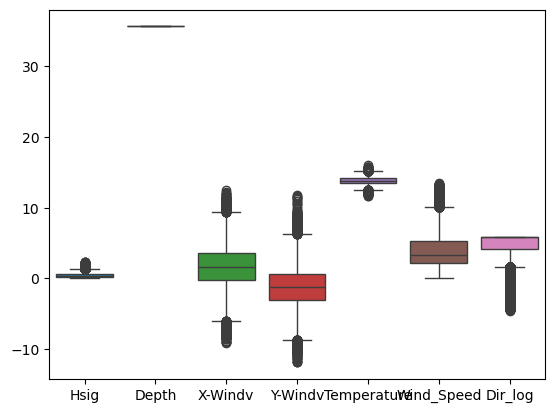

In [68]:
sns.boxplot(xy.drop(columns = ['Dir']))

In [69]:
xy['Depth'].count()
xy['Depth'].unique()

array([35.6057])

Depth is the same value for all our samples, so we take it off. 

In [70]:
xy.head()
xy.drop(columns=['Depth'], inplace=True)

In [71]:
data.drop(columns='Depth', inplace=True)

In [72]:
xy.describe()

,Hsig,Dir,X-Windv,Y-Windv,Temperature,Wind_Speed,Dir_log
count,68700.000000,68700.000000,68700.000000,68700.000000,68700.000000,68700.000000,68700.000000
mean,0.435389,220.545658,1.703099,-1.251485,13.797785,3.888229,4.615197
std,0.339275,150.762981,2.881887,2.820067,0.500162,2.367770,1.869936
min,0.034440,0.000000,-9.087300,-11.874300,11.564120,0.035977,-4.605170
25%,0.175168,63.473500,-0.262875,-3.090000,13.458761,2.099363,4.150780
50%,0.318310,340.240000,1.612400,-1.275900,13.799923,3.235630,5.829681
75%,0.608995,353.503250,3.600725,0.662550,14.136728,5.286243,5.867921
max,2.271350,360.000000,12.412800,11.782200,16.036464,13.467091,5.886132


## EDA

<Axes: >

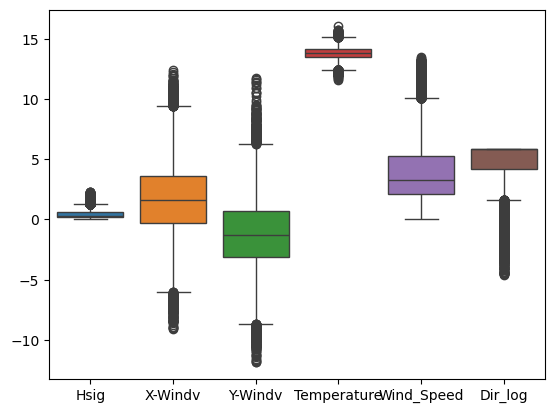

In [73]:
sns.boxplot(xy.drop(columns='Dir'))

In [74]:
xy.head()

,Hsig,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log
0,0.03444,353.248,0.3128,-1.7557,Summer,14.045279,1.783347,West,5.867199
1,0.03459,350.817,0.4156,-1.0176,Summer,13.727790,1.099197,West,5.860293
2,0.03479,354.399,0.4148,-1.7209,Summer,14.120766,1.770185,West,5.870452
3,0.03502,348.335,0.1343,-0.3577,Fall,14.558437,0.382081,West,5.853193
4,0.03545,138.355,1.9610,-0.3797,Summer,13.679845,1.997422,East,4.929895


In [75]:
#sns.pairplot(xy.drop(columns=['Season', 'Dir', 'Wind_Dir_Category']), hue= 'Hsig', corner=True)

In [76]:
xy.head()

,Hsig,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log
0,0.03444,353.248,0.3128,-1.7557,Summer,14.045279,1.783347,West,5.867199
1,0.03459,350.817,0.4156,-1.0176,Summer,13.727790,1.099197,West,5.860293
2,0.03479,354.399,0.4148,-1.7209,Summer,14.120766,1.770185,West,5.870452
3,0.03502,348.335,0.1343,-0.3577,Fall,14.558437,0.382081,West,5.853193
4,0.03545,138.355,1.9610,-0.3797,Summer,13.679845,1.997422,East,4.929895


### Adressing Colinearity

We first do that and then binning/interaction terms as we want to compute interaction terms and process bining with relevant features. 

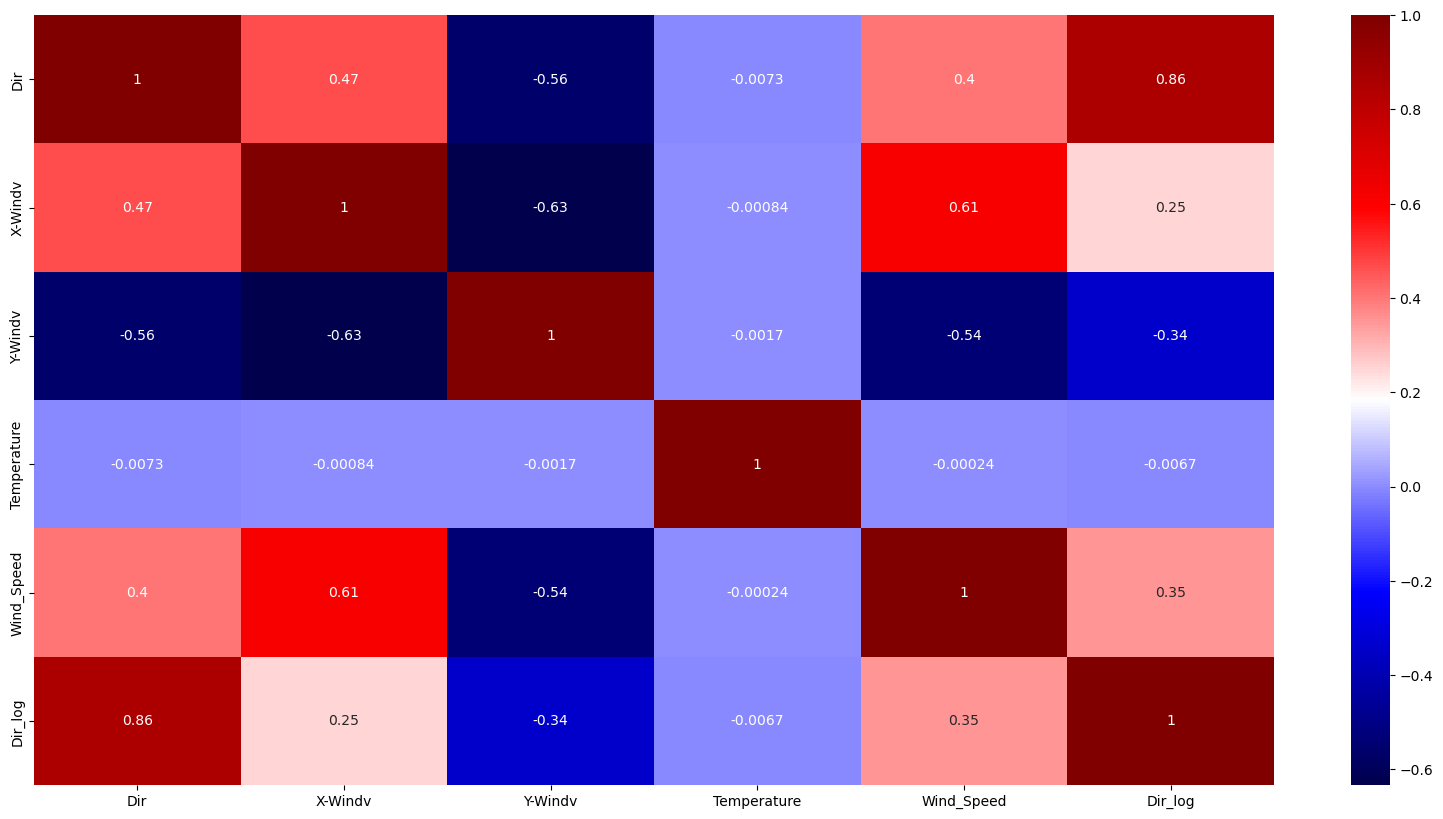

In [77]:
fig, ax = plt.subplots(figsize=(20, 10))
corr = xy.drop(columns=['Hsig']).select_dtypes(include=np.number).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "seismic",annot=corr);

### Bining

<Axes: xlabel='Temperature', ylabel='Count'>

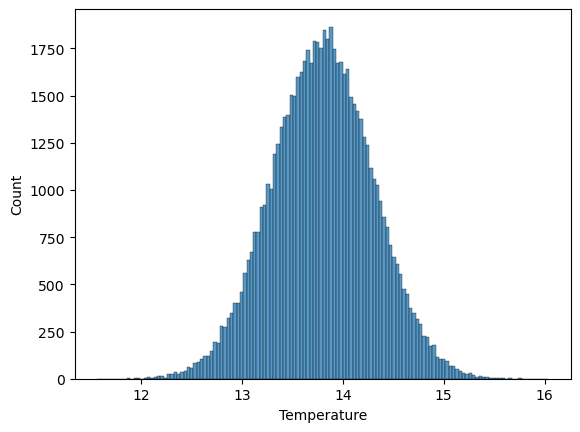

In [78]:
sns.histplot(xy['Temperature'])

Regarding the plot above we considered the following binning

In [79]:
xy['Temperature'] = pd.cut(xy['Temperature'], bins=[-30, 12, 13, 14, 15, 16, 30], labels=['neg-12', ' 12-13', '13-14', '14-15', '15-16','16+'])

### Interaction Terms

In [80]:
xy.head()

,Hsig,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log
0,0.03444,353.248,0.3128,-1.7557,Summer,14-15,1.783347,West,5.867199
1,0.03459,350.817,0.4156,-1.0176,Summer,13-14,1.099197,West,5.860293
2,0.03479,354.399,0.4148,-1.7209,Summer,14-15,1.770185,West,5.870452
3,0.03502,348.335,0.1343,-0.3577,Fall,14-15,0.382081,West,5.853193
4,0.03545,138.355,1.9610,-0.3797,Summer,13-14,1.997422,East,4.929895


We may first consider adding the column Wind Speed * Wave Direction as large winds coming from a speicific direction may directly impact the height of the wave. 
After that, we may also consider Wind Speed * X-Wind and Wind Speed * Y-Windv as it combines directional effects with the magnitude of the wave (Wind Speed)

In [81]:
xy['WS_WD'] = xy['Wind_Speed'] * xy['Dir_log']
xy['WS_YW'] = xy['Wind_Speed'] * xy['Y-Windv']
xy['WS_XW'] = xy['Wind_Speed'] * xy['X-Windv']

In [82]:
from sklearn.model_selection import train_test_split
X = xy.drop(columns=['Hsig'])
y = xy['Hsig']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

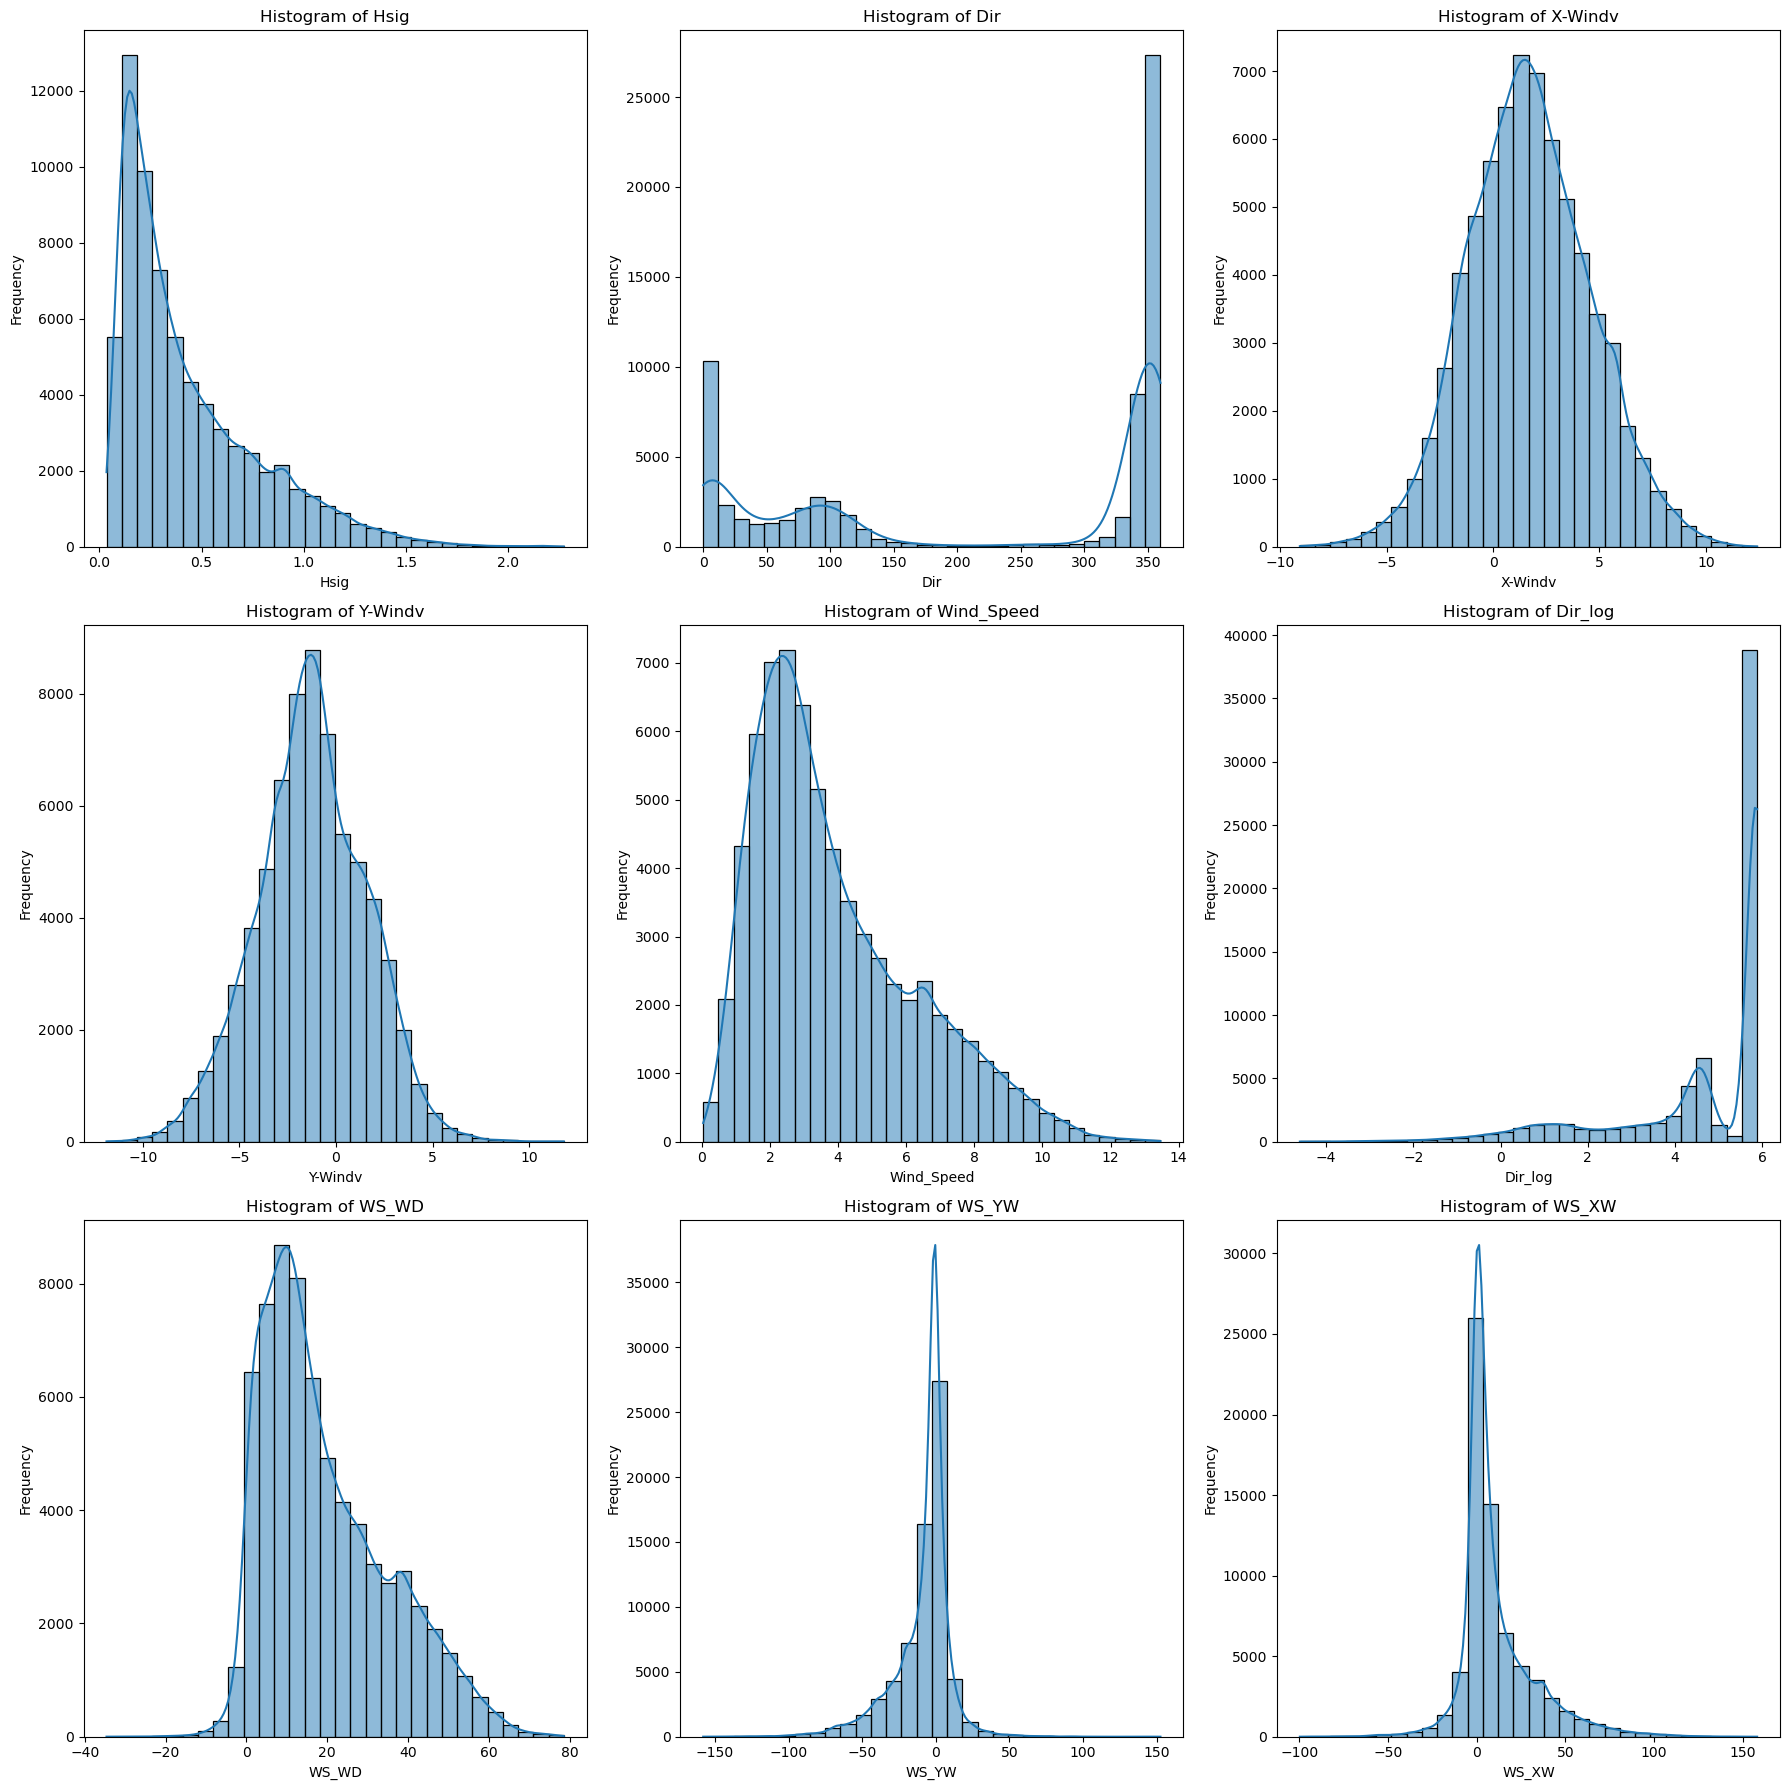

In [83]:
def plot_all_histograms(df, bins=30):
    """
    Plots a histogram for each numeric column in the DataFrame in a grid layout.
    
    Parameters:
    - df: pandas DataFrame with data.
    - bins: int, the number of bins for the histograms.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_all_histograms(xy)

As we can see, the 'Dirrection' as well as Wind Speed are highly skewed, so we will apply on it a Robust scaler. 
Temperature is normalised so we will apply a standard Scaler.
We will obviously Label encode all our categorical feature. 
Regarding the interaction terms we will all regard them as skewed for simplicity reason, and as such we will apply a RObust scaler on them. 

In [84]:
# from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# standard_scaler_features = ['X-Windv', 'Y-Windv', 'WS_WD', 'WS_YW', 'WS_XW']
# robust_scaler_features = ['Wind_Speed', 'Dir_log']
# categorical_features = ['Season', 'Wind_Dir_Category', 'Temperature']

# standard_pipe = Pipeline([
#     ('scaler', StandardScaler())
# ])

# robust_pipe = Pipeline([
#     ('scaler', RobustScaler())
# ])

# cat_pipe = Pipeline([
#     ('encoder', LabelEncoder())
# ])

# prep_pip = ColumnTransformer([
#     ('standard', standard_pipe, standard_scaler_features),
#     ('robust', robust_pipe, robust_scaler_features),  # Using the same categorical pipeline as before
#     ('categorical', cat_pipe, categorical_features),],
#     remainder='passthrough'  
# )
# prep_pip 

#This code did not work but I found interesting to keep it as I did not know that label encoder could not be used within a pipeline. Hence the code below.


In [85]:
from sklearn.preprocessing import LabelEncoder
lhe_season = LabelEncoder()
encoded_Season = lhe_season.fit_transform(xy['Season'])
lhe_Wind = LabelEncoder()
encoded_Wind_Dir_Category = lhe_Wind.fit_transform(xy['Wind_Dir_Category'])
lhe_temp = LabelEncoder()
encoded_Temperature = lhe_temp.fit_transform(xy['Temperature'])
xy['Season'] = encoded_Season
xy['Wind_Dir_Category'] = encoded_Wind_Dir_Category
xy['Temperature'] = encoded_Temperature

In [86]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
standard_scaler_features = ['X-Windv', 'Y-Windv']
robust_scaler_features = ['Wind_Speed', 'Dir_log', 'WS_WD', 'WS_YW', 'WS_XW', 'Dir']

standard_pipe = Pipeline([
    ('scaler', StandardScaler())
])

robust_pipe = Pipeline([
    ('scaler', RobustScaler())
])

prep_pip = ColumnTransformer([
    ('standard', standard_pipe, standard_scaler_features),
    ('robust', robust_pipe, robust_scaler_features),],  # Using the same categorical pipeline as before],
    remainder='passthrough'  
)
prep_pip 

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['X-Windv', 'Y-Windv']),
                                ('robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['Wind_Speed', 'Dir_log', 'WS_WD', 'WS_YW',
                                  'WS_XW', 'Dir'])])

In [87]:
from sklearn.model_selection import train_test_split
X = xy.drop(columns=['Hsig'])
y = xy['Hsig']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [88]:
X_train.head()

,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log,WS_WD,WS_YW,WS_XW
59072,349.287,2.6464,-4.2065,1,0,4.969716,3,5.855923,29.102271,-20.905110,13.151856
19680,355.059,-1.6561,-0.5337,2,2,1.739972,3,5.872312,10.217659,-0.928623,-2.881568
36337,359.121,-1.6020,1.1205,2,1,1.954974,3,5.883687,11.502457,2.190549,-3.131869
8046,7.656,-0.2614,-1.3695,2,1,1.394224,1,2.036795,2.839748,-1.909390,-0.364450
51377,357.535,3.8681,-3.5169,2,1,5.227885,3,5.879261,30.736103,-18.385949,20.221983


# Part 2: Model Selection and Evaluation


In [89]:
X.head()

,Dir,X-Windv,Y-Windv,Season,Temperature,Wind_Speed,Wind_Dir_Category,Dir_log,WS_WD,WS_YW,WS_XW
0,353.248,0.3128,-1.7557,2,2,1.783347,3,5.867199,10.463251,-3.131022,0.557831
1,350.817,0.4156,-1.0176,2,1,1.099197,3,5.860293,6.441614,-1.118542,0.456826
2,354.399,0.4148,-1.7209,2,2,1.770185,3,5.870452,10.391787,-3.046312,0.734273
3,348.335,0.1343,-0.3577,0,2,0.382081,3,5.853193,2.236393,-0.136670,0.051313
4,138.355,1.9610,-0.3797,2,1,1.997422,0,4.929895,9.847079,-0.758421,3.916944


In [90]:
from sklearn.model_selection import train_test_split
X = xy.drop(columns=['Hsig'])
y = xy['Hsig']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- Baseline Model: Start by fitting a parametric linear model as a baseline. Evaluate this model using both R² and Mean Squared Error (MSE) as performance metrics. These metrics will serve as a reference to assess improvements with other models.

In [91]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Ridge Regression
ridge_model = Ridge()
ridge_pipe = Pipeline([
    ('preprocessor', prep_pip),
    ('model', ridge_model)
])
ridge_pipe.fit(X_train, y_train)
y_predict_ridge = ridge_pipe.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_predict_ridge)
r2_ridge = r2_score(y_test, y_predict_ridge)
print('Mean Squared Error for Ridge Regression:', mse_ridge)
print('R2 Score for Ridge Regression:', r2_ridge)


Mean Squared Error for Ridge Regression: 0.02881684698539781
R2 Score for Ridge Regression: 0.7469767123443354


As we can see, this behaves really pourly. But I hope that we will try to improve it. 

- Ensemble Models: GOEI is interested in seeing how ensemble methods perform on this dataset. Choose two ensemble models. To tune these models, use `RandomizedSearchCV` with 5-fold cross-validation (`cv=5`) and explore **two different hyperparameters for each model**

- Performance Evaluation: For each model, evaluate performance on R² and MSE. Based on the results, choose the best-performing model and save it as `final_model`. Record the best hyperparameters used in this model as `Best_parameters`.

- Test Set Evaluation: Use the `final_model` to predict on the test set and assess performance using R² and MSE. Report these metrics as evidence of the model’s effectiveness on unseen data.

### Why those those two ensemble models
- We have been given in class solutions that could run in tens of seconds. 
- However, regarding the shape of the data and the hyperparameters we could put for our model, putting a number of estimator for example that is to - large is really not computationally efficient and may take minutes, which is something we won't do. 
- As such, certain ensemble methods as the one below that may take to long for Randomize search are not taken into account. 
- Same for Adaboost and Gradient boosting. Testing those models and their running time, the choice for the two models has been finally RandomForest Regressor and XGB Regressor which is a derivative of RandomForest regressor using a different appproach.
For more information, see https://www.youtube.com/watch?v=OtD8wVaFm6E&t=15s Stat Quest video. 

### Meaning of the hyperparameters we tuned. 

#### Random forest
- See Assessment images folder to see where those two reasonings come from. They just describe how our summarised the functionning of the RandomForest algorithm. 
- All those informations come from this video of Stat Quest: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=442s
- For the first parameter, min_sample_split, we are basically saying that as much as our splitting is increasing, our computation will decrease.
- Indeed, if the minimum number of split is 2, we will have more split than if we put 5, and as such deeper trees, and so more computation. But the minimum number of split of 2 increases as such the precision. 
- Same for leaf nodes. Allowing smaller samples leads to more leaf nodes, and as each input must traverse the tree to these deeper levels. So the lowest min_sample leaf increases our computation time and our precision. 

#### XGBoost model

- Max_depth controls the maximum depth of each decision tree in the model, whilst the learning rate controls the step size by which the model updates weights after each boosting round.
- The higher the depth, the increase in computation and ability to learn intricate patterns as we will have deeper trees. 
- The lower the learning rate, the more iterations our model will do. It also means our model will converge more slowly. Higher values of learning rate lead to more rapid convergence but can lead as well to overfitting as it may forget 'precisions' on the way. 
- I choose those two parameters as they interact with each other in many ways. One of them is that a deeper tree can capture more patterns in the data, which can lead to overfitting; which then need but a low earning rate to ensure that updates are made cautiously.
-  As we will, the best parameters of our model represent the above as the moderate maximum depth of 5 interacts with a relativily low learning of 0.1

In [92]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
rf_model_simple = RandomForestRegressor(random_state=42)
rf_pipe_simple = Pipeline([
    ('preprocessor', prep_pip),
    ('model', rf_model_simple)
])

param_dist_rf = {
    'model__n_estimators': [25],  # Fewer trees
    'model__max_depth': [5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_pipe_simple,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_rf.fit(X_train, y_train)
y_predict_rf = random_search_rf.predict(X_test)
mean_rf = mean_squared_error(y_test, y_predict_rf)
r2_rf = r2_score(y_test, y_predict_rf)
print('Mean Squared Error for Random Forest:', mean_rf)
print('R2 Score for Random Forest:', r2_rf)

/opt/homebrew/Caskroom/miniconda/base/envs/dsml/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mean Squared Error for Random Forest: 0.02272503677020814
R2 Score for Random Forest: 0.8004652098611769


In [93]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Define the pipeline
xgb_pipe = Pipeline([
    ('preprocessor', prep_pip),
    ('model', xgb_model)
])

# Define parameter distributions for RandomizedSearchCV
param_dist_xgb = {
    'model__max_depth': [3, 5, 7, 10],
    'model__learning_rate': [0.01, 0.1, 0.2, 0.3],
}

# RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist_xgb,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

random_search_xgb.fit(X_train, y_train)
best_model_xgb = random_search_xgb.best_estimator_
y_predict_xgb = best_model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_predict_xgb)
r2_xgb = r2_score(y_test, y_predict_xgb)
print('Mean Squared Error for XGBoost:', mse_xgb)
print('R2 Score for XGBoost:', r2_xgb)

Mean Squared Error for XGBoost: 0.018723913842856023
R2 Score for XGBoost: 0.8355966480058874


In [ ]:
#I am putting that to show the process of thinking as some attempts were useless, computational time being far to big. 

# from sklearn.ensemble import StackingRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# random_f_regressor = RandomForestRegressor(n_estimators=10)
# lr_model = LinearRegression()
# ridge_model = Ridge()
# lasso_model = Lasso()

# # Ada_regressor = AdaBoostRegressor()
# # gdb_model = GradientBoostingRegressor()

# base_models = [('rf', random_f_regressor), ('lr', lr_model), ('rg', ridge_model), ('lass', lasso_model)] #, ('Ada', Ada_regressor), ('SGDC', gdb_model)]
# meta_model = ElasticNet()

# stacking_model = StackingRegressor(estimators=base_models, final_estimator= meta_model)

# stacking_pipeline = Pipeline(steps=[
#     ('preprocessor', prep_pip),
#     ('stacking model', stacking_model)
# ])

# stacking_pipeline.fit(X_train, y_train)
# stacking_pipeline.predict(X_test)

# # y_pred_stacking = stacking_pipeline.predict(X_test)
# # stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
# # print("Accuracy score for Stacking classifier: {stacking_accuracy}")
# # print(stacking_accuracy)

In [95]:
final_model = random_search_xgb.best_estimator_
Best_parameters = random_search_xgb.best_params_

y_predict_final = final_model.predict(X_test)
mse_final = mean_squared_error(y_test, y_predict_final)
r2_final = r2_score(y_test, y_predict_final)
print('Mean Squared Error for Final Model:', mse_final)
print('R2 Score for Final Model:', r2_final)




Mean Squared Error for Final Model: 0.018723913842856023
R2 Score for Final Model: 0.8355966480058874


In [96]:
xy['Hsig'].describe()

count    68700.000000
mean         0.435389
std          0.339275
min          0.034440
25%          0.175168
50%          0.318310
75%          0.608995
max          2.271350
Name: Hsig, dtype: float64

- Even though the MSE is low, this is not indicative of the performance of our model. Indeed, given the fact that our target variable range is low, the MSE is likely to low as well (ortherwise we have a big problem). In our case, the minimum is 0.03 and max is 2.27.
- As such, for the Mean Squared error to be relevant, we should compare it to the scale of our target variable. 
- We will then calculate the relative error which is our MSE squared over the mean of 'Hsig' which is 0.435

In [97]:
rmse = np.sqrt(mse_final) 
relative_error = rmse / y_test.mean()
print('The relative error of the model is:', relative_error*100, '%')

The relative error of the model is: 31.51373593414541 %


Let's compare it to our baseline model. 

In [98]:
rmse_baseline = np.sqrt(mse_ridge)
relative_error_baseline = rmse_baseline / y_test.mean()
print('The relative error of the baseline model is:', relative_error_baseline*100, '%')

The relative error of the baseline model is: 39.0953229281324 %


- This is a good improvement compared to our baseline. However, this is not guite good.
- Indeed, a 31.71% relative error shows the model is capturing trends in the data but is not highly precise.
- For a variable like Hsig, which represents wave height, this level of error may or may not be acceptable depending on the application's tolerance for inaccuracies (e.g., maritime safety might require higher precision) as large waves may not be predicted. 
- For this average, we can say that our predictions are off (0.31*0.435) 0.135 meters in average. 

- The R² Score of 0.8401 for the final model indicates that approximately 84.01% of the variance in the target variable (Hsig) is explained by the model
- Compared to the baseline model R² score of 0.74, this is an improvement.
- We should be careful however of overfitting as capturing a large variance can also mean overfitting our data, which happens when models are complex like ours. However this should not be a concern here as the R² score is not far from our linear model.